In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [2]:
timeslot = 200000

In [3]:
time=np.sin(np.arange(0, timeslot, 1));
pm25=np.random.normal(90,15,timeslot)
humid=np.random.normal(50,15,timeslot)

temp2_fluc=np.random.normal(15,3,timeslot)

In [4]:
max_temp=1
seasonal=np.arange(0,max_temp,max_temp/timeslot)
seasonal_pm=np.arange(0,10,10/timeslot)

In [ ]:
temp_flux=np.random.rand(len(time)) * (3)

In [6]:
basetmp=30
temp=temp_flux+basetmp+seasonal
pm25=pm25+seasonal_pm

In [15]:
temp2_fluc=temp+temp2_fluc

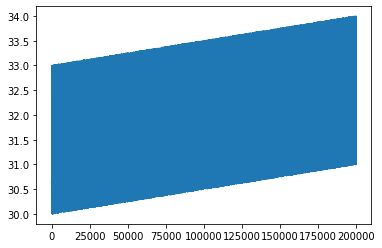

In [7]:
plt.plot(temp)

In [8]:
from datetime import date, timedelta

sdate = date(1997,3,22)   # start date
edate = date(2020,4,9)   # end date

In [9]:
index=pd.date_range(sdate,edate-timedelta(days=1),freq='H')

In [10]:
date_index=index[:len(temp)]

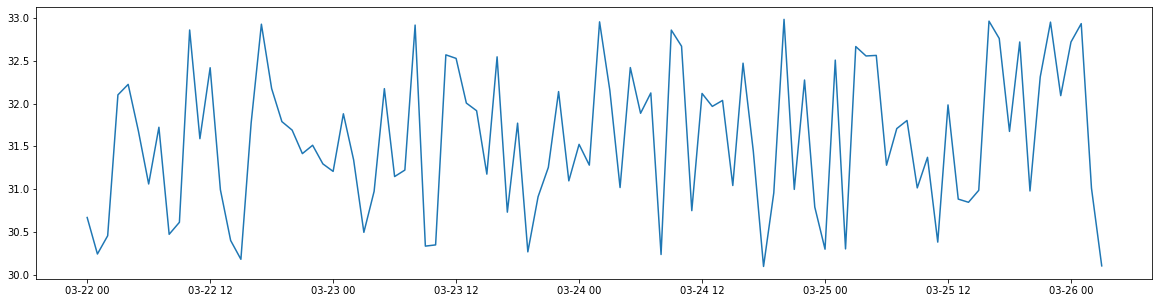

In [11]:
plt.figure(figsize=(20,5))
plt.plot(date_index[:100],temp[:100])

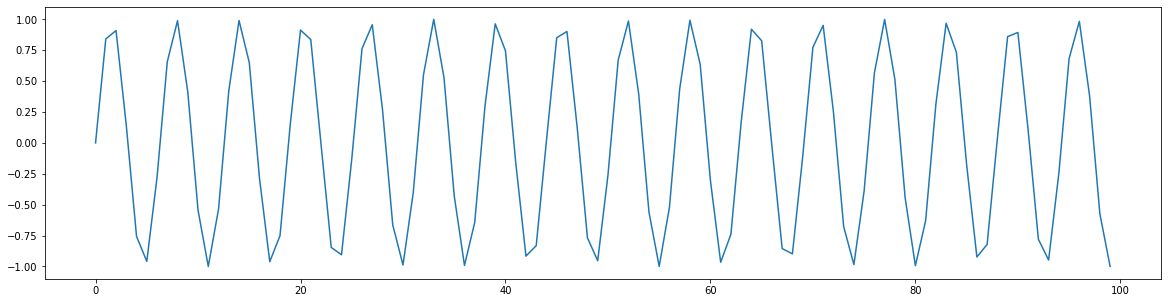

In [12]:
plt.figure(figsize=(20,5))
plt.plot(time[:100])

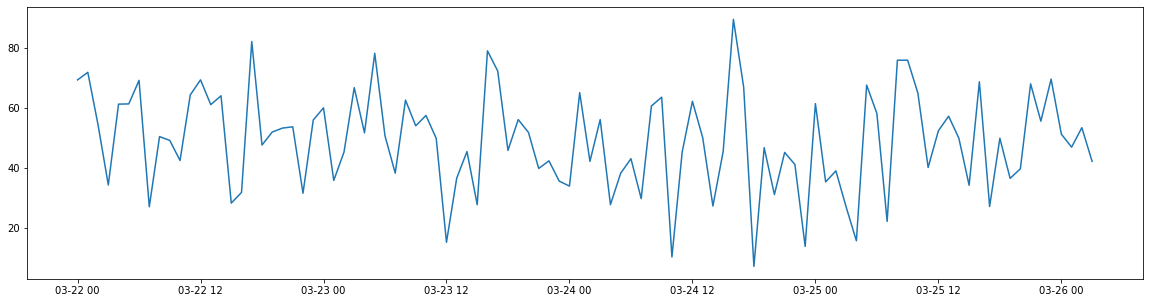

In [13]:
plt.figure(figsize=(20,5))
plt.plot(date_index[:100],humid[:100])

In [17]:
df=pd.DataFrame(date_index,columns=['timestamp'])

In [18]:
df['temperature'] = pd.Series(temp, index=df.index)
df['temperature_2'] = pd.Series(temp2_fluc, index=df.index)
df['humidity'] = pd.Series(humid, index=df.index)
df['pm25'] = pd.Series(pm25, index=df.index)

In [40]:
df.drop('timestamp',axis=1,inplace=True)

In [20]:
df

,timestamp,temperature,temperature_2,humidity,pm25
0,1997-03-22 00:00:00,30.666859,42.905286,69.278549,73.176753
1,1997-03-22 01:00:00,30.239994,42.346924,71.816301,99.831752
2,1997-03-22 02:00:00,30.453342,51.251634,54.307711,81.723008
3,1997-03-22 03:00:00,32.101142,51.414465,34.272507,106.310826
4,1997-03-22 04:00:00,32.224055,48.445189,61.208857,103.956207
...,...,...,...,...,...
199995,2020-01-14 03:00:00,32.747796,44.237619,36.065964,103.482888
199996,2020-01-14 04:00:00,33.470564,52.609505,67.520002,79.767530
199997,2020-01-14 05:00:00,33.201562,49.922655,57.418014,98.884484
199998,2020-01-14 06:00:00,31.499347,48.619073,38.374781,88.891794


In [19]:
for index, row in df.iterrows():
    data={
    "temperature":row['temperature'],
    "temperature_2":row['temperature_2'],
    "humidity":row['humidity'],
    "pm2.5":row['pm25']
    }
    json_dump = json.dumps(data)
    print(json_dump)
    break

{"temperature": 30.66685856502529, "temperature_2": 42.90528580442983, "humidity": 69.27854924799985, "pm2.5": 73.17675288239514}


In [21]:
df.to_csv("mock_data.csv",index=False)